In [8]:
import torch
torch.cuda.set_device(0)
from diffusers import StableDiffusionXLPipeline
from PIL import Image
import pillow_avif
import os
from ip_adapter import EasyRef

# base_model_path = "stabilityai/stable-diffusion-xl-base-1.0"
# multimodal_llm_path = "Qwen/Qwen2-VL-2B-Instruct"
base_model_path = "/mnt/afs/zongzhuofan/models/stable-diffusion-xl-base-1.0" # use your own path
multimodal_llm_path = "/mnt/afs/zongzhuofan/models/Qwen2-VL-2B-Instruct" # use your own path
ip_ckpt = "checkpoints/pytorch_model.bin"
device = "cuda"

def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

In [9]:
pipe = StableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.float16,
    add_watermarker=False,
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [10]:
easyref = EasyRef(pipe, multimodal_llm_path, ip_ckpt, device, num_tokens=64, use_lora=True, lora_rank=128)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

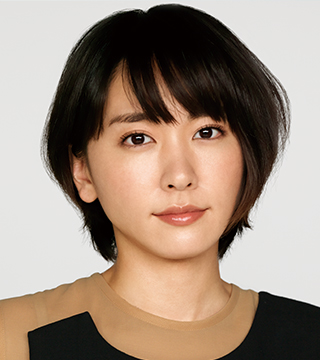

In [26]:
root = "assets/aragaki_identity"
images = []
for image in os.listdir(root):
    images.append(Image.open(os.path.join(root, image)))
images[0]

In [119]:
template = "Visualize a scene that closely resembles the provided images, capturing the essence and details described in this prompt:\n"
num_samples = 2
prompt = "An oil painting of a smiling woman."
negative_prompt = "A collage of images, monochrome, lowres, bad anatomy, worst quality, low quality"
system_prompt = [template + prompt, template]
seed = 24 # 420 is also okay
results = easyref.generate(
    pil_image=images,
    system_prompt=system_prompt, 
    prompt=prompt, 
    negative_prompt=negative_prompt, 
    num_samples=num_samples,
    num_inference_steps=30,
    seed=seed)
grid = image_grid(results, 1, num_samples)

  0%|          | 0/30 [00:00<?, ?it/s]

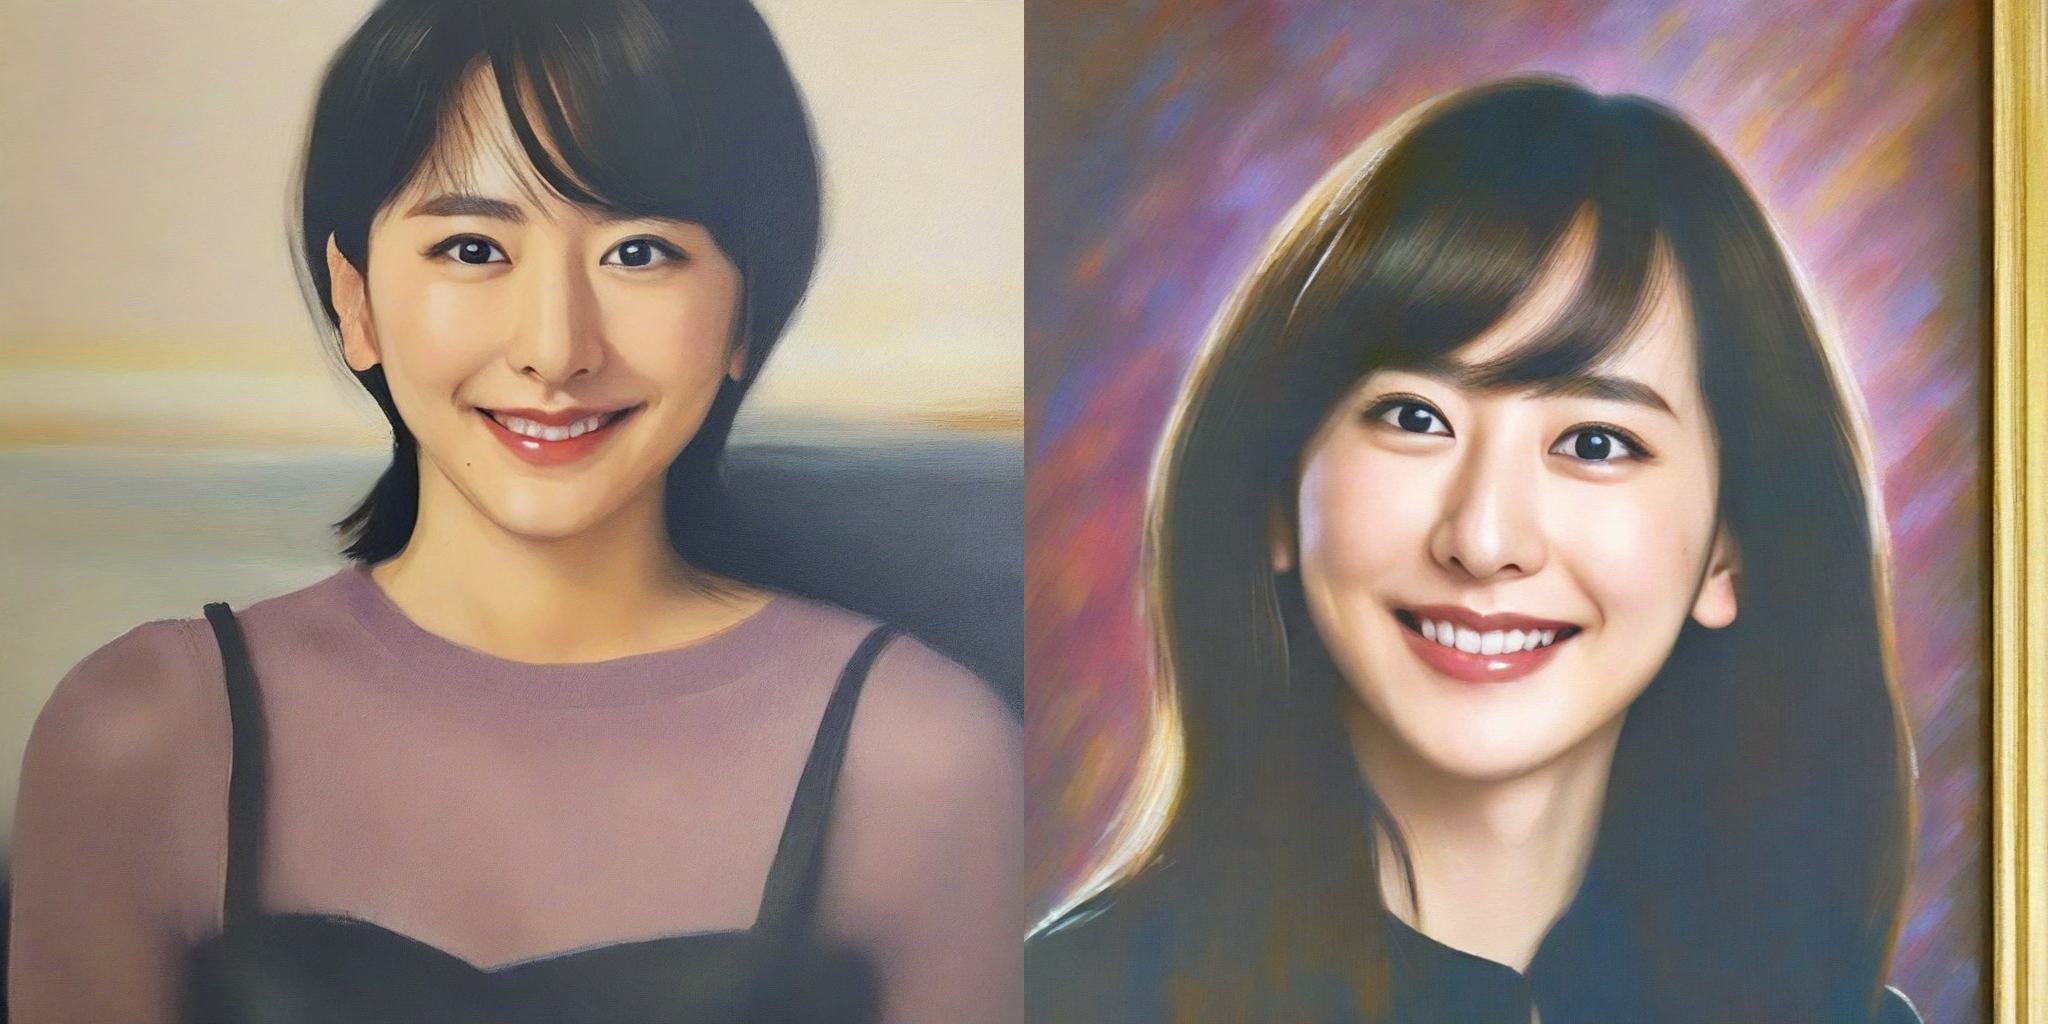

In [120]:
grid

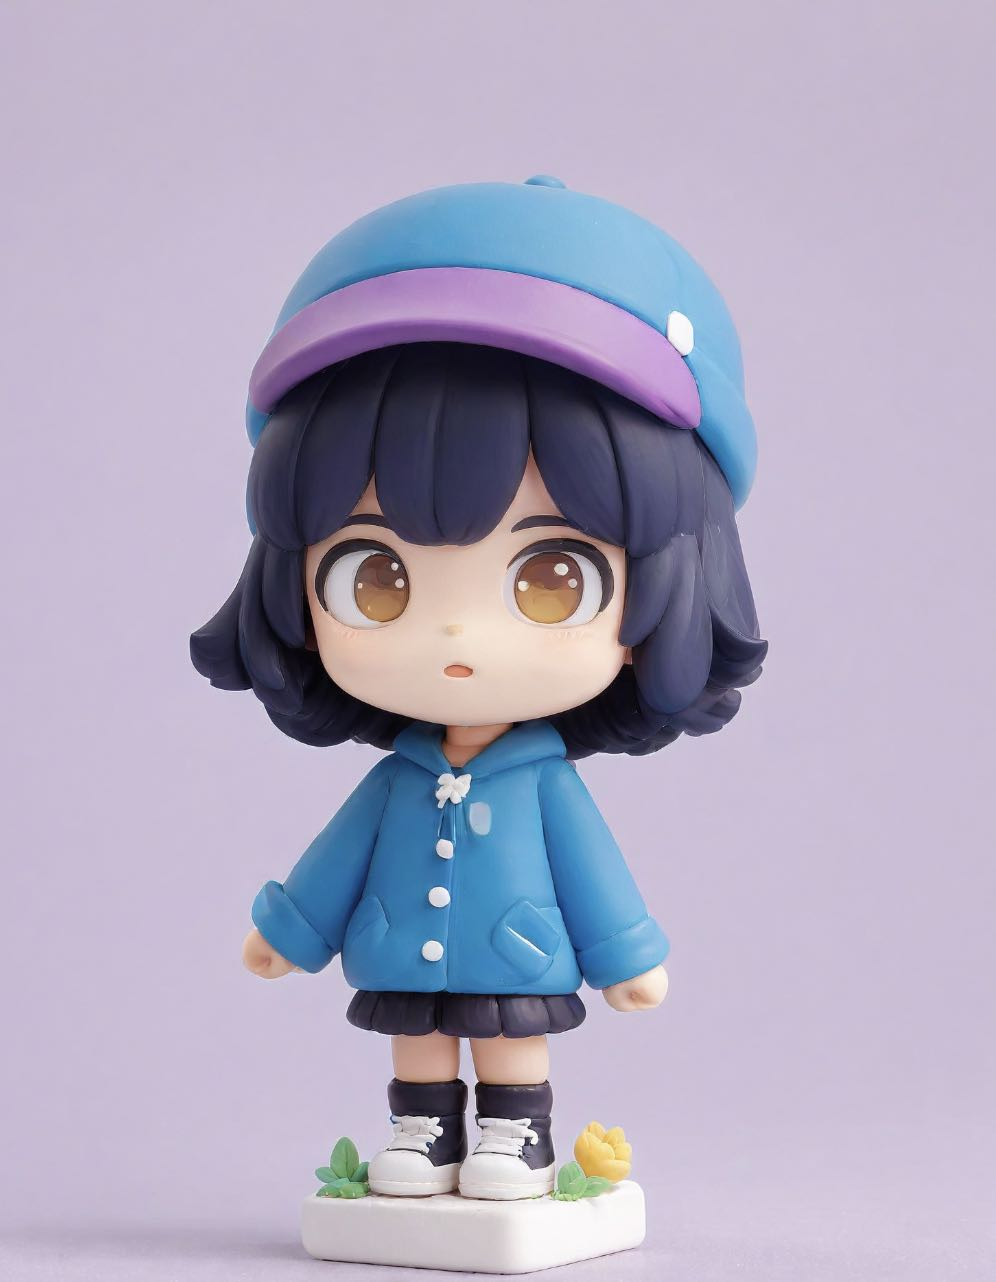

In [126]:
root = "assets/blindbox_style"
images = []
for image in os.listdir(root):
    images.append(Image.open(os.path.join(root, image)))
images[0]

In [127]:
template = "Visualize a scene that closely resembles the provided images, capturing the essence and details described in this prompt:\n"
num_samples = 2
prompt = "Donald Trump"
negative_prompt = "A collage of images, monochrome, lowres, bad anatomy, worst quality, low quality"
system_prompt = [template + prompt, template]
seed = 24
results = easyref.generate(
    pil_image=images,
    system_prompt=system_prompt, 
    prompt=prompt, 
    negative_prompt=negative_prompt, 
    num_samples=num_samples,
    num_inference_steps=30,
    seed=seed)
grid = image_grid(results, 1, num_samples)

  0%|          | 0/30 [00:00<?, ?it/s]

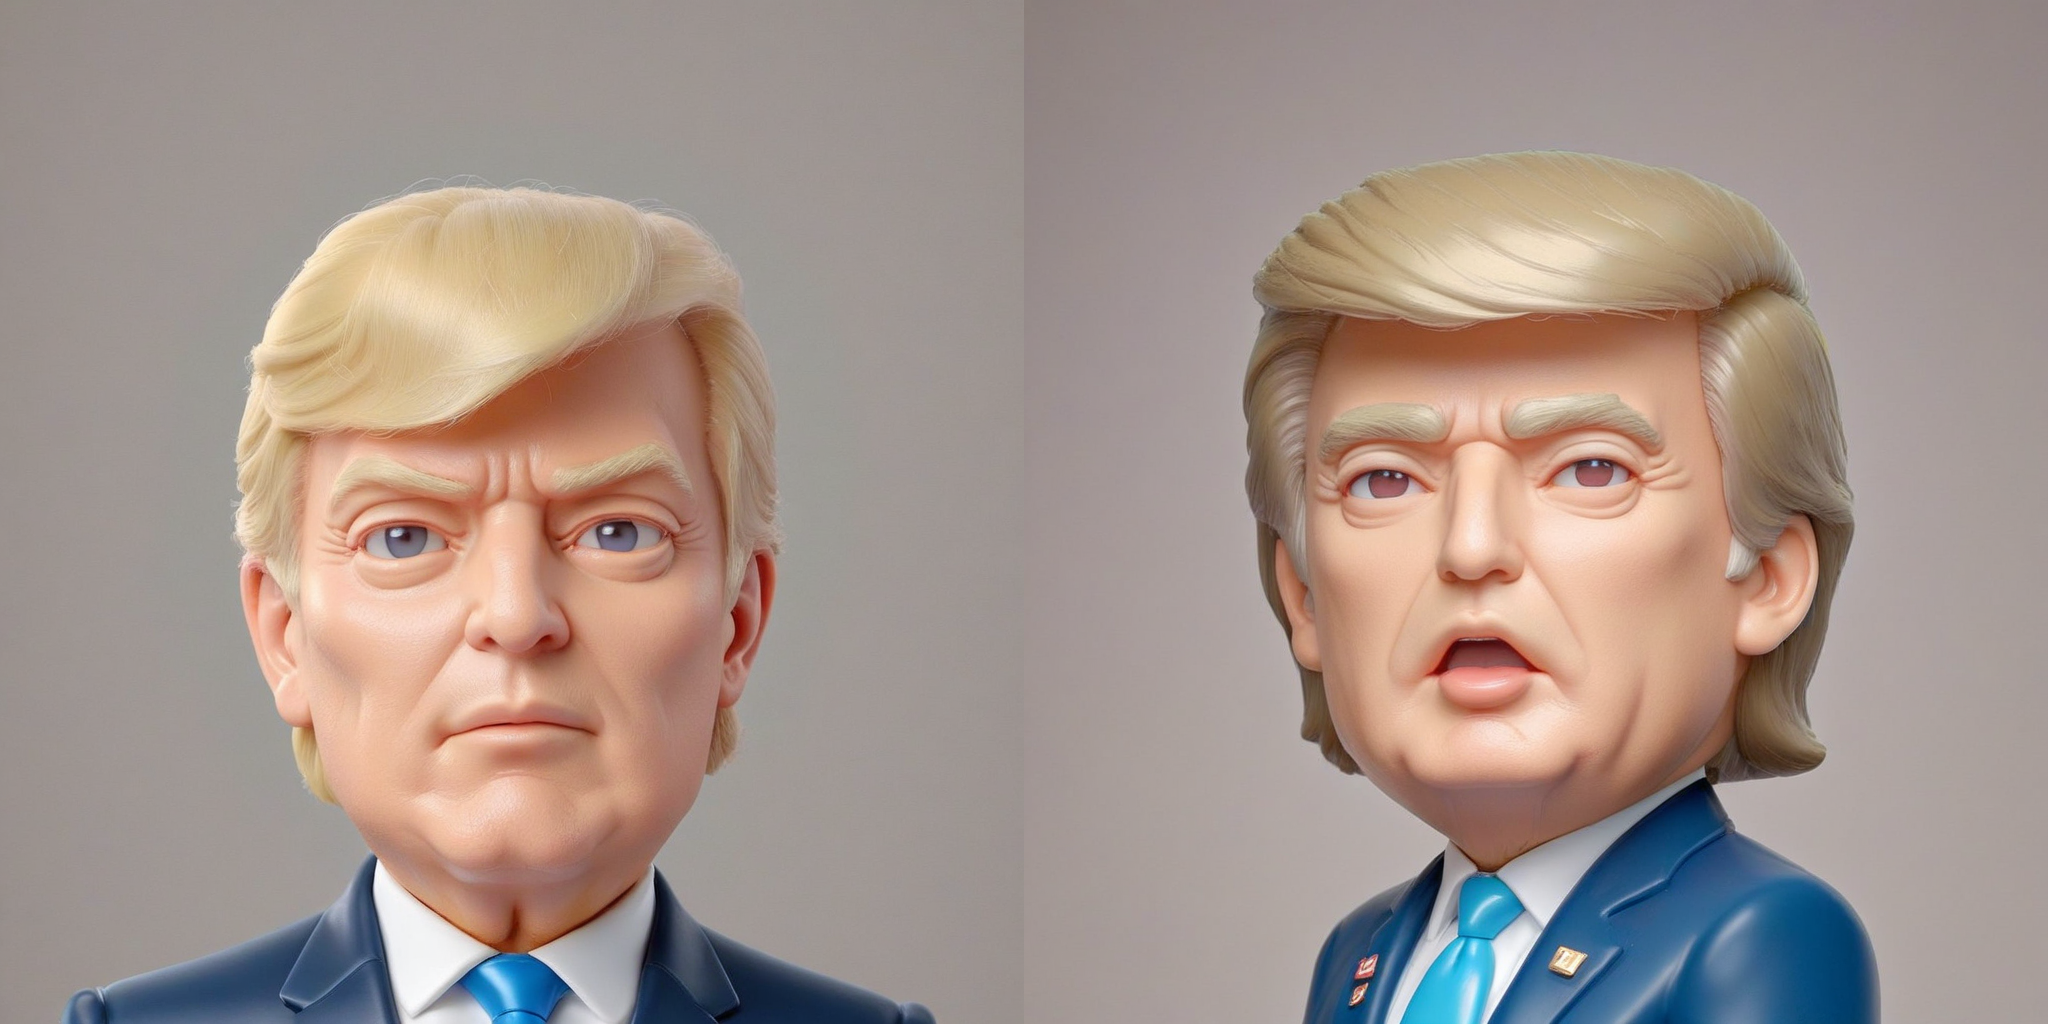

In [128]:
grid